# CAPM - Capital Asset Pricing Model 

Watch the video for the full overview.

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [1]:
# Model CAPM as a simple linear regression

In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [3]:
import pandas as pd

In [4]:
import pandas_datareader as web

In [5]:
spy_etf = web.DataReader('SPY','yahoo')

In [6]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2315 entries, 2010-01-04 to 2019-03-15
Data columns (total 6 columns):
High         2315 non-null float64
Low          2315 non-null float64
Open         2315 non-null float64
Close        2315 non-null float64
Volume       2315 non-null float64
Adj Close    2315 non-null float64
dtypes: float64(6)
memory usage: 126.6 KB


In [7]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,94.130867
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,94.380074
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,94.446495
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,94.845207
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,95.160805


In [8]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [9]:
aapl = web.DataReader('AAPL','yahoo',start,end)

In [17]:
spy_etf = web.DataReader('SPY','yahoo', start, end)

In [18]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Cumulative,Daily Return
Date,,,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.386072,1.000000,NaN
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.421322,1.001729,0.001729
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.096491,0.985795,-0.015906
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.059338,0.983973,-0.001849
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.192701,0.990515,0.006648


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

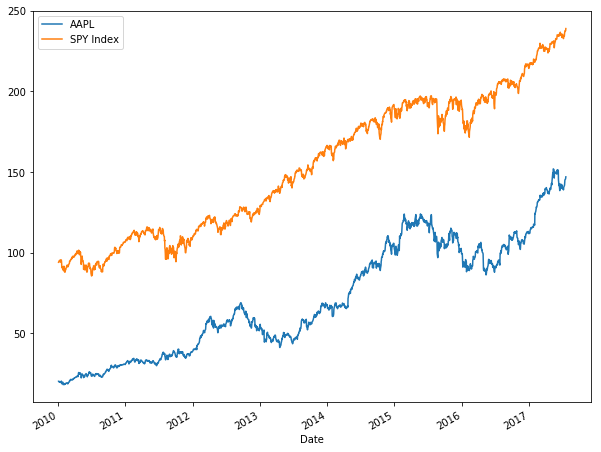

In [19]:
aapl['Adj Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Adj Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [20]:
aapl['Cumulative'] = aapl['Adj Close']/aapl['Adj Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Adj Close']/spy_etf['Adj Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

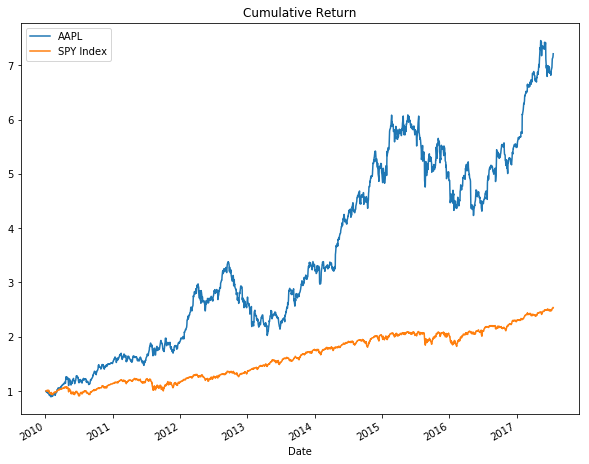

In [21]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [22]:
aapl['Daily Return'] = aapl['Adj Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)

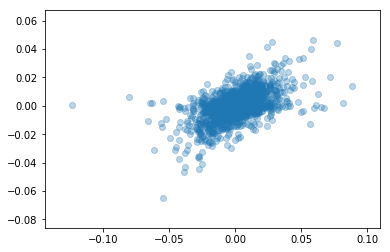

In [23]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

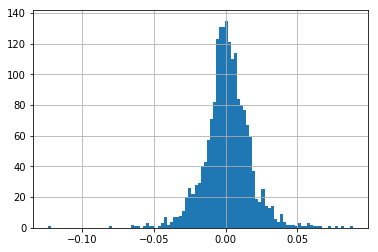

In [24]:
aapl['Daily Return'].hist(bins=100)

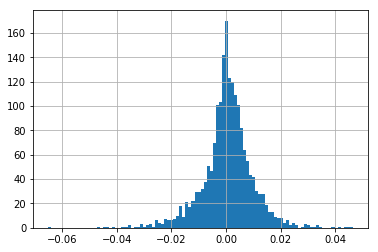

In [25]:
spy_etf['Daily Return'].hist(bins=100)

In [26]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [27]:
beta

0.31876348793398646

In [28]:
alpha

0.00016114373710705604

In [29]:
r_value

0.5502533539979676

## What if our stock was completely related to SP500?

In [31]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004222
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [32]:
import numpy as np

In [33]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [34]:
noise

array([ 0.00021539,  0.00059215, -0.0014417 , ...,  0.00059444,
        0.00013229,  0.00125036])

In [36]:
fake = spy_etf['Daily Return'].iloc[1:] + noise

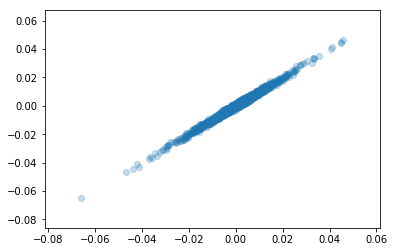

In [37]:
plt.scatter(fake, spy_etf['Daily Return'].iloc[1:], alpha=0.25)

In [38]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake,spy_etf['Daily Return'].iloc[1:])

In [67]:
beta

0.9902145894162997

In [39]:
alpha

7.492728531935736e-08

Looks like our understanding is correct!